# **Pimer Parcial de Inteligencia Artificial**
### **Nombre:** Steve Brandom Nina Huacani



### **Pregunta 1. Seleccione un dataset de su interés (de cualquier repositorio, que contenga datos tabulares mínimo de 1500 filas y al menos 10 columnas). Realice el cálculo de la media, moda, cuartiles de datos y de percentiles por columna; explique qué significa en cada caso graficando los resultados (sin numpy y pandas).**

Importamos el dataset elegido en este caso "Wine Quality", relacionado con las variantes tinta y blanca del vino portugués "Vinho Verde". EL dataset lo guardaremos en Drive y lo importaremos de la siguiente forma:

In [1]:
#Importamos la libreria para realizar graficas
import matplotlib.pyplot as plt
#Importamos el modulo de Google Drive
#from google.colab import drive
#MOntamos la carpeta content de Drive
#drive.mount("/content/drive")
#Asignamos la ruta donde se encuentra nuestro dataset
#archivo="/content/drive/MyDrive/data/wine_quality.csv"
archivo = "wine_quality.csv"

Definiremos la funcion obtenerDatos() que nos permitira abrir ell archivo csv, dentro de el crearemos dos arrays uno sera unidimensional que almacenara la primera fila del archivo y el otro sera bidimensional almacenando los registros del dataset.

In [2]:
#Funcion para obtener los datos en forma de arrays directamente del archivo csv
def obtenerDatos(ruta):
  #Array que almacenara las cabeceras del dataset
  cabecera = []
  #Array que almacenara los registros del dataset
  registros = []
  #lectura del archivo csv
  with open(ruta, 'r') as archivo:
    #almacena las lineas del archivo csv
    filas = archivo.readlines()
    #lectura linea por linea del archivo
    for i, fila in enumerate(filas):
      #separamos los valores con el patron de comas
      valores = fila.strip().split(',')
      #almacenamos las cabeceras
      if i == 0:
        cabeceras = valores
      #almacenamos los registros
      else:
        registros.append(valores)
    #devolvemos los arrays encontrados
    return cabeceras, registros

### **Media**
También conocida como promedio, es una medida de tendencia central que representa el valor promedio de un conjunto de datos. Se calcula sumando todos los valores y luego dividiendo esta suma por el número total de valores en el conjunto.
$$\bar x = \frac{\sum^n _{i=1} x_i}{n}$$
Definiremos una funcion llamada getMedia() la cual tendra como parametros:
el array de cabeceras, el array de registros, y la columna la cual queremos obtener la media este dato debera ser de tipo cadena.

In [3]:
#funcion para hallar la media
def getMedia(cabeceras, registros, columna):
  suma = 0
  #buscara la posicion del nombre de la columna introducida esto con el fin de luego de encontrar la columna en el array de registros
  indice = cabeceras.index(columna)
  #iteramos sumando los valores de la columna
  for i in range(len(registros)):
    #convertimos a float ya que con la funcion anterior los datos eran cadenas
    suma += float(registros[i][indice])
  #devolvemos la media
  return suma/len(registros)

### **Moda**
La moda es simplemente el valor o valores que ocurren más frecuentemente en un conjunto de datos. Puede haber una moda, ninguna moda o múltiples modas en un conjunto de datos, dependiendo de cómo estén distribuidos los valores.\
Definiremos la funcion getModa() que tendra como parametros: el array de cabeceras, el array de registros y el nombre de la columna que debera ser de tipo cadena. Esta funcion creara un diccionario el cual nos permitira iterar sobre la columna verificando e incrementando las ocurrencias de cada dato, devolviendo el primer dato que mas veces se repita y el numero de veces que se repita.

In [4]:
#funcion para obtener la moda
def getModa(cabeceras, registros, columna):
  #creamos un diccionario que almacenara las frecuencias
  frecuencias = {}
  #buscara la posicion del nombre de la columna introducida esto con el fin de luego de encontrar la columna en el array de registros
  indice = cabeceras.index(columna)
  #iteramos la columna seleccionada
  for i in range(len(registros)):
    dato = float(registros[i][indice])
    #si el dato esta en el diccionario sumamos una frecuencia
    if dato in frecuencias:
      frecuencias[dato] += 1
    #si no esta creamos un registro con el valor de 1
    else:
      frecuencias[dato] = 1
  #obtenemos el dato con el mayor numero de repeticiones
  moda = max(frecuencias, key=frecuencias.get)
  #obtenemos la cantidad que la moda se repite en la columna
  frecuencia_moda = frecuencias[moda]
  #devolvemos la moda y la cantidad de veces que se repite
  return moda, frecuencia_moda

### **Cuartiles**
Los cuartiles son medidas estadísticas que dividen un conjunto de datos en cuatro partes iguales, cada una representando el 25% de los datos. Los tres cuartiles principales son:

Primer Cuartil (Q1): Representa el 25% inferior de los datos. Es el valor que separa el 25% más bajo del resto de los datos.

Segundo Cuartil (Q2): Es equivalente a la mediana y representa el valor que separa el 50% inferior del 50% superior de los datos.

Tercer Cuartil (Q3): Representa el 75% inferior de los datos. Es el valor que separa el 25% superior del resto de los datos.

Como estamos trabajando sobre datos no agrupados aplicaremos la siguiente formula cuando la longitud del array sea par:
$$\frac{kn}{4}$$
y cuando sea impar:
$$\frac{k(n+1)}{4}$$
Definiremos la funcion getCuartiles() donde enviaremos como parametros el array de cabeceras, el array de registros y el nombre de la columna que debera ser de tipo cadena. Obtendremos el cuartil $q_1$,$q_2$y$q_3$

In [5]:
#definimos la funcion para obtener los cuartiles
def getCuartiles(cabeceras, registros, columna):
    #creamos un array donde se almacenaran los cuartiles
    array = []
    #buscara la posicion del nombre de la columna introducida esto con el fin de luego de encontrar la columna en el array de registros
    indice = cabeceras.index(columna)
    #iteramos la colmna llevando cada elemento a un array unidimensional
    for i in range(len(registros)):
      array.append(float(registros[i][indice]))
    #ordenamos nuestro array
    array.sort()
    #obtenemos la posicion de los cuartiles dentro del array
    if(len(array)%2==0):
      q1 = len(registros)//4
      q2 = (2*len(registros))//4
      q3 = (3*len(registros))//4
    else:
      q1 = (len(registros)+1)//4
      q2 = (2*(len(registros)+1))//4
      q3 = (3*(len(registros)+1))//4
    #devolvemos el cuartil q1,q2,q3
    return array[q1], array[q2], array[q3]

### **Percentiles**
Los percentiles son medidas estadísticas que dividen un conjunto de datos en 100 partes iguales, cada una representando un 1% de los datos. El percentil Pth (denotado como P) es el valor por debajo del cual cae un porcentaje especificado de los datos.
Definiremos la funcion getPercentiles(),donde enviaremos como parametros el array de cabeceras, el array de registros, el nombre de la columna que debera ser de tipo cadena y el numero de percentil que se desa calcular. Primeramente ordenaremo nuestro array y calcularemos el percentil de la siguiente manera cuando la longitud del array sea par:
$$\frac{pn}{100}$$
y cuando sea impar:
$$\frac{p(n+1)}{100}$$
La funcion retornara el valor del percentil deseado.

In [6]:
#funcion para obtener los percentiles
def getPercentiles(cabeceras, registros, columna, percentil):
    #array para almacenar los datos de la columna de forma unidimensional
    array = []
    #buscara la posicion del nombre de la columna introducida esto con el fin de luego de encontrar la columna en el array de registros
    indice = cabeceras.index(columna)
    #iteramos la colmna llevando cada elemento a un array unidimensional
    for i in range(len(registros)):
      array.append(float(registros[i][indice]))
    #ordenamos el array
    array.sort()
    #obtenemos la posicion del percentil deseado
    if(percentil == 100):
      p = len(array)-1
    else:
      if(len(array)%2==0):
        p = (percentil * len(registros))//100
      else:
        p = (percentil * (len(registros)+1))//100
    #devolvemos el percentil
    return array[p]

### **Graficas**
Para realizar las graficas utilizaremos la libreria matplotlib de python que nos permitira visualizar los datos.
Definiremos la funcion gracficar() que tendra como parametros el array de a cabecera, el array de registros, el nombre de la columna que debera de ser de tipo cadena, y las lenyendas para el eje $x$ y para el eje $y$.

In [7]:
def graficarTipos(cabecera, registros, columna, x, y):
  indice = cabeceras.index(columna)
  array = []
  #buscara la posicion del nombre de la columna introducida esto con el fin de luego de encontrar la columna en el array de registros
  indice = cabeceras.index(columna)
  for i in range(len(registros)):
      array.append(registros[i][indice])
  frecuencias = {}
  for dato in array:
    if dato in frecuencias:
      frecuencias[dato] += 1
    else:
      frecuencias[dato] = 1

  valores = list(frecuencias.keys())
  conteos = list(frecuencias.values())

  plt.bar(valores, conteos)
  plt.xlabel(x)
  plt.ylabel(y)
  plt.title(columna)
  plt.show()

In [8]:
#funcion para graficar las columnas
def graficar(cabecera, registros, columna, x, y):
  indice = cabecera.index(columna)
  #buscara la posicion del nombre de la columna introducida esto con el fin de luego de encontrar la columna en el array de registros
  array = []

  #obntenemos las frecuencias de cada valor
  for i in range(len(registros)):
      array.append(float(registros[i][indice]))
  frecuencias = {}
  for dato in array:
    if dato in frecuencias:
      frecuencias[dato] += 1
    else:
      frecuencias[dato] = 1
  #lista que contendra los valores de la columna
  valores = list(frecuencias.keys())
  #lista que contendra la cantidad de ocurrencias de cada valor en la columna
  conteos = list(frecuencias.values())

  #grafica en forma de barras de los valores y la cantidad de ocurrencias
  plt.bar(valores, conteos)
  #leyenda del eje x
  plt.xlabel(x)
  #leyenda del eje y
  plt.ylabel(y)
  #nombre de la grafica
  plt.title(columna)

  # Calcula la media, moda
  moda, frecuencia  = getModa(cabeceras, registros, columna)
  # Agrega líneas verticales
  plt.axvline(getMedia(cabeceras, registros, columna), color='r', linestyle='dashed', linewidth=2, label='Media')
  plt.axvline(moda, color='g', linestyle='dashed', linewidth=2, label='Moda')
  #mostramos las leyendas
  plt.legend()
  #imprimimos el grafico
  plt.show()


### **Valores de la media por columnas**

In [9]:
cabeceras, registros = obtenerDatos(archivo)
print("La media de la columna fixed acidity es: ",getMedia(cabeceras,registros,"fixed acidity"))
print("La media de la columna volatile acidity es: ",getMedia(cabeceras,registros,"volatile acidity"))
print("La media de la columna citric acid es: ",getMedia(cabeceras,registros,"citric acid"))
print("La media de la columna residual sugar es: ",getMedia(cabeceras,registros,"residual sugar"))
print("La media de la columna chlorides es: ",getMedia(cabeceras,registros,"chlorides"))
print("La media de la columna free sulfur dioxide es: ",getMedia(cabeceras,registros,"free sulfur dioxide"))
print("La media de la columna total sulfur dioxide es: ",getMedia(cabeceras,registros,"total sulfur dioxide"))
print("La media de la columna density es: ",getMedia(cabeceras,registros,"density"))
print("La media de la columna pH es: ",getMedia(cabeceras,registros,"pH"))
print("La media de la columna sulphates es: ",getMedia(cabeceras,registros,"sulphates"))
print("La media de la columna alcohol es: ",getMedia(cabeceras,registros,"alcohol"))
print("La media de la columna quality es: ",getMedia(cabeceras,registros,"quality"))

La media de la columna fixed acidity es:  7.2153070647991235
La media de la columna volatile acidity es:  0.3396659996921661
La media de la columna citric acid es:  0.31863321533014705
La media de la columna residual sugar es:  5.443235339387428
La media de la columna chlorides es:  0.05603386178236132
La media de la columna free sulfur dioxide es:  30.525319378174544
La media de la columna total sulfur dioxide es:  115.7445744189626
La media de la columna density es:  0.9946966338309937
La media de la columna pH es:  3.218500846544555
La media de la columna sulphates es:  0.5312682776666168
La media de la columna alcohol es:  10.491800831152897
La media de la columna quality es:  5.818377712790519


### **Valores de la moda por columnas**

In [10]:
print("La moda de la columna fixed acidity es: ",getModa(cabeceras,registros,"fixed acidity"))
print("La moda de la columna volatile acidity es: ",getModa(cabeceras,registros,"volatile acidity"))
print("La moda de la columna citric acid es: ",getModa(cabeceras,registros,"citric acid"))
print("La moda de la columna residual sugar es: ",getModa(cabeceras,registros,"residual sugar"))
print("La moda de la columna chlorides es: ",getModa(cabeceras,registros,"chlorides"))
print("La moda de la columna free sulfur dioxide es: ",getModa(cabeceras,registros,"free sulfur dioxide"))
print("La moda de la columna total sulfur dioxide es: ",getModa(cabeceras,registros,"total sulfur dioxide"))
print("La moda de la columna density es: ",getModa(cabeceras,registros,"density"))
print("La moda de la columna pH es: ",getModa(cabeceras,registros,"pH"))
print("La moda de la columna sulphates es: ",getModa(cabeceras,registros,"sulphates"))
print("La moda de la columna alcohol es: ",getModa(cabeceras,registros,"alcohol"))
print("La moda de la columna quality es: ",getModa(cabeceras,registros,"quality"))

La moda de la columna fixed acidity es:  (6.8, 354)
La moda de la columna volatile acidity es:  (0.28, 286)
La moda de la columna citric acid es:  (0.3, 337)
La moda de la columna residual sugar es:  (2.0, 235)
La moda de la columna chlorides es:  (0.044, 206)
La moda de la columna free sulfur dioxide es:  (29.0, 183)
La moda de la columna total sulfur dioxide es:  (111.0, 72)
La moda de la columna density es:  (0.9972, 69)
La moda de la columna pH es:  (3.16, 200)
La moda de la columna sulphates es:  (0.5, 276)
La moda de la columna alcohol es:  (9.5, 367)
La moda de la columna quality es:  (6.0, 2836)


### **Valores de los cuartiles por columnas**

In [11]:
print("Los cuartiles de la columna fixed acidity es: ",getCuartiles(cabeceras,registros,"fixed acidity"))
print("Los cuartiles de la columna volatile acidity es: ",getCuartiles(cabeceras,registros,"volatile acidity"))
print("Los cuartiles de la columna citric acid es: ",getCuartiles(cabeceras,registros,"citric acid"))
print("Los cuartiles de la columna residual sugar es: ",getCuartiles(cabeceras,registros,"residual sugar"))
print("Los cuartiles de la columna chlorides es: ",getCuartiles(cabeceras,registros,"chlorides"))
print("Los cuartiles de la columna free sulfur dioxide es: ",getCuartiles(cabeceras,registros,"free sulfur dioxide"))
print("Los cuartiles de la columna total sulfur dioxide es: ",getCuartiles(cabeceras,registros,"total sulfur dioxide"))
print("Los cuartiles de la columna density es: ",getCuartiles(cabeceras,registros,"density"))
print("Los cuartiles de la columna pH es: ",getCuartiles(cabeceras,registros,"pH"))
print("Los cuartiles de la columna sulphates es: ",getCuartiles(cabeceras,registros,"sulphates"))
print("Los cuartiles de la columna alcohol es: ",getCuartiles(cabeceras,registros,"alcohol"))
print("Los cuartiles de la columna quality es: ",getCuartiles(cabeceras,registros,"quality"))

Los cuartiles de la columna fixed acidity es:  (6.4, 7.0, 7.7)
Los cuartiles de la columna volatile acidity es:  (0.23, 0.29, 0.4)
Los cuartiles de la columna citric acid es:  (0.25, 0.31, 0.39)
Los cuartiles de la columna residual sugar es:  (1.8, 3.0, 8.1)
Los cuartiles de la columna chlorides es:  (0.038, 0.047, 0.065)
Los cuartiles de la columna free sulfur dioxide es:  (17.0, 29.0, 41.0)
Los cuartiles de la columna total sulfur dioxide es:  (77.0, 118.0, 156.0)
Los cuartiles de la columna density es:  (0.99234, 0.99489, 0.99699)
Los cuartiles de la columna pH es:  (3.11, 3.21, 3.32)
Los cuartiles de la columna sulphates es:  (0.43, 0.51, 0.6)
Los cuartiles de la columna alcohol es:  (9.5, 10.3, 11.3)
Los cuartiles de la columna quality es:  (5.0, 6.0, 6.0)


### **Valores de los percentiles por columnas**

In [12]:
print("El percentil de la columna fixed acidity es: ",getPercentiles(cabeceras,registros,"fixed acidity", 50))
print("El percentil de la columna volatile acidity es: ",getPercentiles(cabeceras,registros,"volatile acidity", 50))
print("El percentil de la columna citric acid es: ",getPercentiles(cabeceras,registros,"citric acid", 50))
print("El percentil de la columna residual sugar es: ",getPercentiles(cabeceras,registros,"residual sugar", 50))
print("El percentil de la columna chlorides es: ",getPercentiles(cabeceras,registros,"chlorides", 50))
print("El percentil de la columna free sulfur dioxide es: ",getPercentiles(cabeceras,registros,"free sulfur dioxide", 50))
print("El percentil de la columna total sulfur dioxide es: ",getPercentiles(cabeceras,registros,"total sulfur dioxide", 50))
print("El percentil de la columna density es: ",getPercentiles(cabeceras,registros,"density", 50))
print("El percentil de la columna pH es: ",getPercentiles(cabeceras,registros,"pH", 50))
print("El percentil de la columna sulphates es: ",getPercentiles(cabeceras,registros,"sulphates", 50))
print("El percentil de la columna alcohol es: ",getPercentiles(cabeceras,registros,"alcohol", 50))
print("El percentil de la columna quality es: ",getPercentiles(cabeceras,registros,"quality", 50))

El percentil de la columna fixed acidity es:  7.0
El percentil de la columna volatile acidity es:  0.29
El percentil de la columna citric acid es:  0.31
El percentil de la columna residual sugar es:  3.0
El percentil de la columna chlorides es:  0.047
El percentil de la columna free sulfur dioxide es:  29.0
El percentil de la columna total sulfur dioxide es:  118.0
El percentil de la columna density es:  0.99489
El percentil de la columna pH es:  3.21
El percentil de la columna sulphates es:  0.51
El percentil de la columna alcohol es:  10.3
El percentil de la columna quality es:  6.0


### **Garfica de la columna "type"**

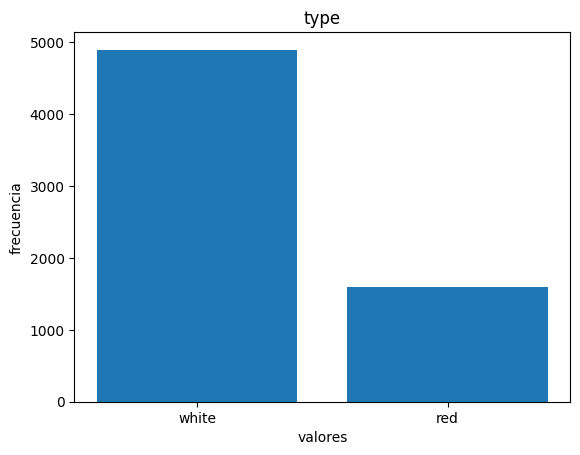

In [13]:
graficarTipos(cabeceras, registros, "type", "valores", "frecuencia")

Se puede observar que el dataset cuenta con mas registros de vinos blancos que de rojos

### **Grafica y explicacion de la columna "fixed acidity"**

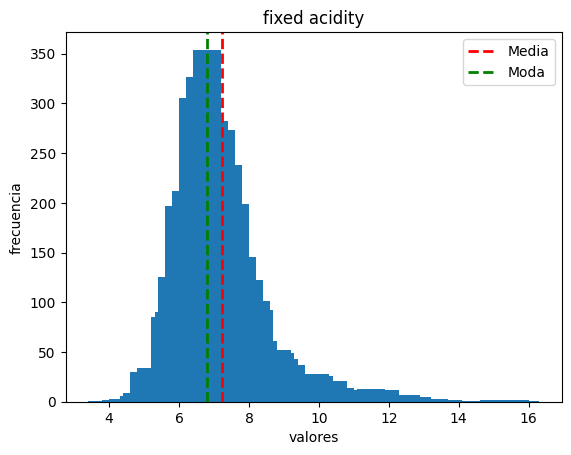

In [14]:
graficar(cabeceras, registros, "fixed acidity", "valores", "frecuencia")

Acidez fija: Es la acidez natural del vino que proviene de los ácidos orgánicos presentes en la uva. Los ácidos más comunes son el ácido tartárico, el ácido málico y el ácido cítrico. La acidez es importante para el equilibrio del vino, ya que le da frescura y estructura. También ayuda a conservar el vino, ya que dificulta el crecimiento de bacterias.

Acidez fija	Gramos por litro (g/l)	Rango aceptable: 4,5-8,5

La media obtenida del dataset es de : 7.2153(g/l)

La moda obtenida del dataset es de: 6.8 (g/l) y se repite 354 veces

Se tiene un indice de acidez fija aceptable

### **Grafica y explicacion de la columna "volatile acidity"**

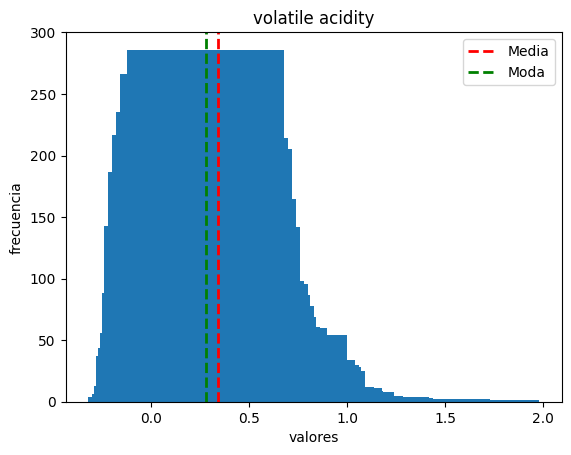

In [15]:
graficar(cabeceras, registros, "volatile acidity", "valores", "frecuencia")

Acidez volátil: Es la acidez producida por las bacterias durante la fermentación. Las bacterias convierten el azúcar en alcohol y otros compuestos, entre ellos el ácido acético. El ácido acético es un ácido volátil, lo que significa que se evapora fácilmente. En exceso, el ácido acético puede dar al vino un sabor desagradable, como a vinagre.

Acidez volátil	Gramos por litro (g/l)	Rango aceptable: 0,2-0,6

La media obtenida en el dataset es de: 0.3396 (g/l)

La moda obtenida en el dataset es de: 0.28(g/l) y se repite 286 veces

Se tiene un indice de acidez volatil aceptable en los vinos

### **Grafica y explicacion de la columna "citric acid"**

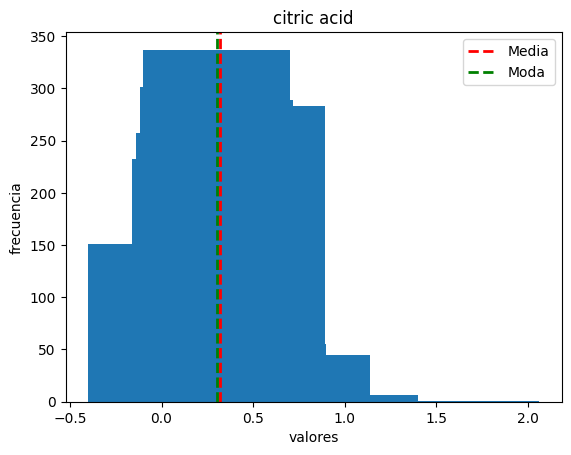

In [16]:
graficar(cabeceras, registros, "citric acid", "valores", "frecuencia")

Ácido cítrico: Es un ácido natural que ayuda a equilibrar el vino y a mejorar su sabor. El ácido cítrico es un ácido de sabor ácido pero refrescante. Se encuentra en muchas frutas, como las naranjas, los limones y las limas.

Acido cítrico	Gramos por litro (g/l) Rango aceptable 0,1-1,5

La media obtenida en el dataset es de: 0.3186 (g/l)

La moda obtenida en el dataset es de: 0.3 (g/5) y se repite 337 veces

Se tiene un indice aceptable de acido citrico, dando a notar que los vinos son poco acidos

### **Grafica y explicacion de la columna "residual sugar"**

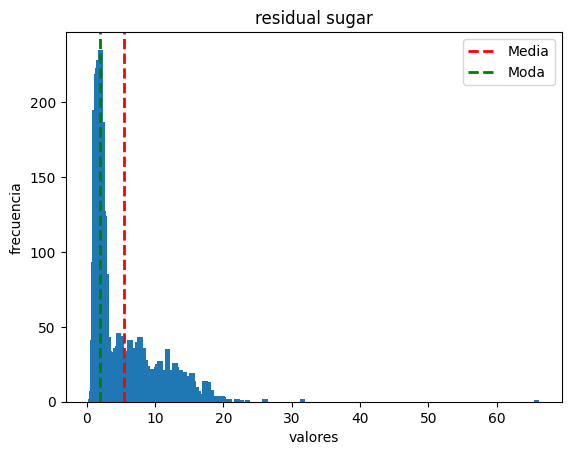

In [17]:
graficar(cabeceras, registros, "residual sugar", "valores", "frecuencia")

Azúcar residual: Es el azúcar que queda en el vino después de la fermentación. El azúcar residual es lo que da a los vinos dulces su sabor dulce. El contenido de azúcar residual en los vinos secos es muy bajo o nulo.

Azúcar residual	Gramos por litro (g/l)	Rango aceptable: 0-50

La media obtenida del dataset es de: 5.4432(g/l)

La moda obtenida del dataset es de: 2.0 (g/l) y se repite 235 veces

Nos indica que gran parte de los vinos no son dulces pero el indice se encuentra de un rango aceptable.

### **Grafica y explicacion de la columna "chlorides"**

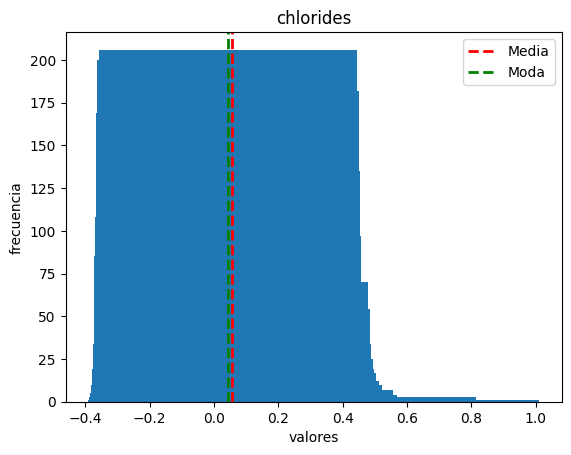

In [18]:
graficar(cabeceras, registros, "chlorides", "valores", "frecuencia")

Clorouros: Son minerales que pueden dar al vino un sabor salado. Los cloruros se encuentran en el suelo y en el agua. La cantidad de cloruros en el vino puede variar según la región vinícola.

Clorouros	Miligramos por litro (mg/l) Rango aceptable	0.3-1

La media obtenida del dataset es de: 0.0560(mg/l)

La moda obtenida del dataset es de: 0.044 (mg/l) y se repite 206 veces

Nos indica que los vinos presentan una cantidad casi nula de sal

### **Grafica y explicacion de la columna "free sulfur dioxide"**

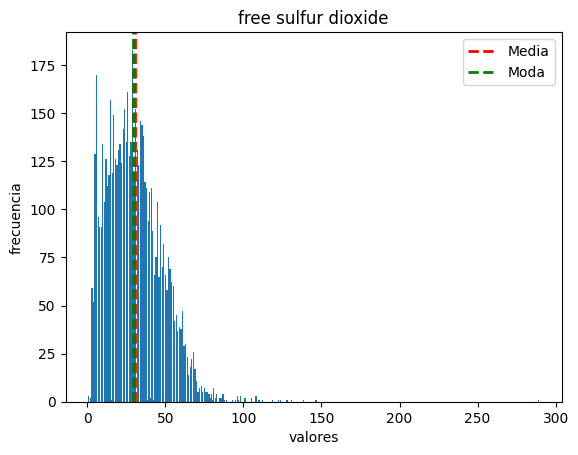

In [19]:
graficar(cabeceras, registros, "free sulfur dioxide", "valores", "frecuencia")

Dióxido de azufre libre: Es un conservante que se utiliza para evitar el deterioro del vino. El dióxido de azufre se agrega al vino durante la elaboración o el embotellado. El dióxido de azufre libre es la forma más activa de dióxido de azufre.

Dióxido de azufre libre	Miligramos por litro (mg/l)	Rango aceptable: 10-50

La media obtenida del dataset es de: 30.5253(mg/l)

La moda obtenida del dataset es de: 29.0 (mg/l) y se repite 183 veces

No se presenta gran cantidad de dioxido de azufre en la muestra de vinos ademas de que gran cantidad de los datos se encuentran en un rango aceptable

### **Grafica y explicacion de la columna "total sulfur dioxide"**

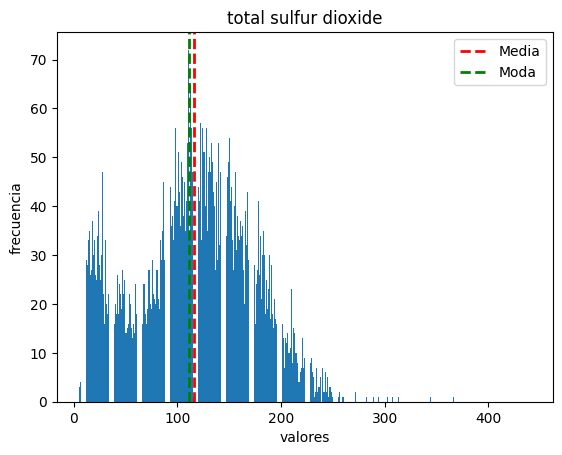

In [20]:
graficar(cabeceras, registros, "total sulfur dioxide", "valores", "frecuencia")

Dióxido de azufre total: Es la suma del dióxido de azufre libre y el dióxido de azufre conjugado. El dióxido de azufre conjugado es una forma de dióxido de azufre que se une a otros compuestos del vino.

Dióxido de azufre total	Miligramos por litro (mg/l) Rango aceptable	100-250

La media obtenida en el dataset es de: 115.7445(mg/l)

La moda obtenida en el dataset es de: 111.0 (mg/l) y se repite 72 veces

Los vinos de la muestra presenta poca candidad de dioxido de azufre y gran parte de la muestra se encuentra en el rango aceptable


### **Grafica y explicacion de la columna "density"**

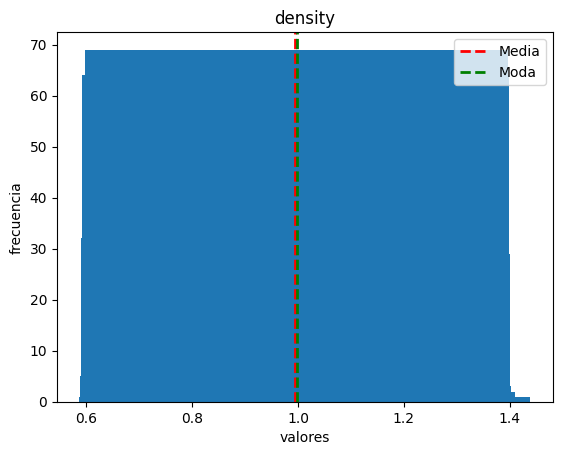

In [21]:
graficar(cabeceras, registros, "density", "valores", "frecuencia")

Densidad: Es una medida de la cantidad de sólidos disueltos en el vino. La densidad del vino se mide en grados Brix. Cuanto mayor sea la densidad, mayor será el contenido de azúcar del vino.

Densidad	Gramos por centímetro cúbico (g/cm3) Rango aceptable	0,990-0,999

La media obtenida en el dataset es de: 0.9946 (g/cm3)

La moda obtenida en el dataset es de: 0.9972 (g/cm3) y se repite 69 veces

Podemos observar casi la mitad de la muestra presenta densidad mayor a la del rango aceptable

### **Grafica y explicacion de la columna "pH"**

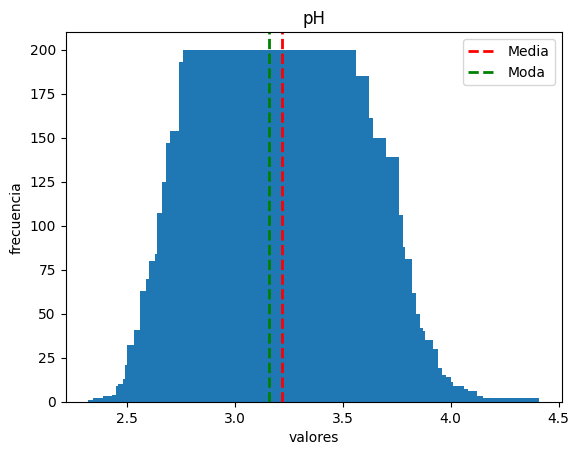

In [22]:
graficar(cabeceras, registros, "pH", "valores", "frecuencia")

pH: Es una medida de la acidez del vino. El pH se mide en una escala de 0 a 14, siendo 7 el punto neutro. Los vinos con un pH inferior a 7 son ácidos, mientras que los vinos con un pH superior a 7 son básicos.

pH	Unidades de pH Rango aceptable 3,0-4,0

La media obtenida del dataset es de: 3.2185

La moda obtenida del dataset es de: 3.16 y se repite 200 veces

La muestra obtenida en el dataset regleja que todos los vinos tiene un pH acido, ademas de que la mayoria se encuentra en el rango aceptable

### **Grafica y explicacion de la columna "sulphates"**

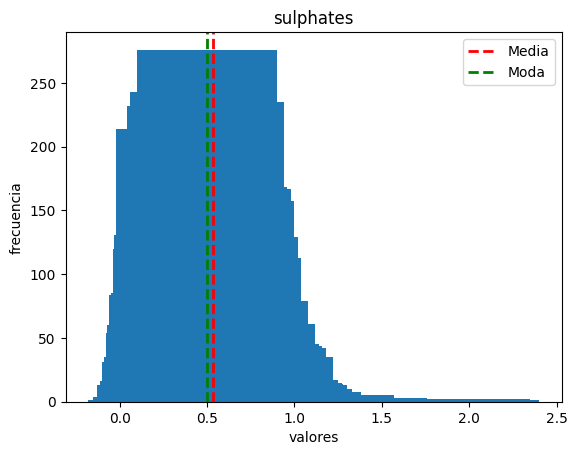

In [23]:
graficar(cabeceras, registros, "sulphates", "valores", "frecuencia")

Sulfatos: Son minerales que pueden dar al vino un sabor amargo. Los sulfatos se encuentran en el suelo y en el agua. La cantidad de sulfatos en el vino puede variar según la región vinícola.

Sulfatos	Miligramos por litro (mg/l) Rango aceptable	1-2.5

La media obtenida del dataset es de: 0.5312(mg/l)

La moda obtenida del dataset es de: 0.5(mg/l) y se repite 276 veces

La grafica muestra que gran parte de los vinos presentan un sabor amargo

### **Grafica y explicacion de la columna "alcohol"**

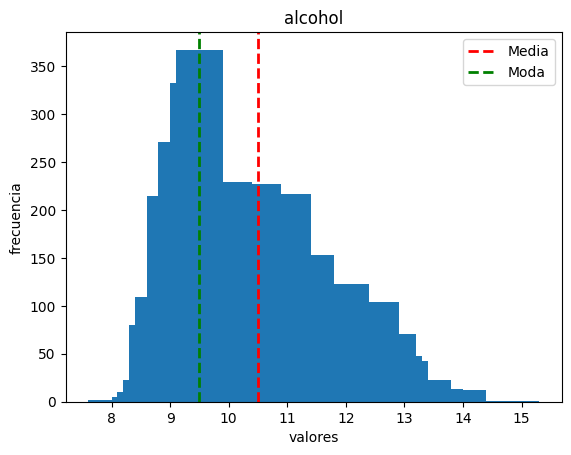

In [24]:
graficar(cabeceras, registros, "alcohol", "valores", "frecuencia")

Alcohol: Es el componente alcohólico del vino. El alcohol se produce durante la fermentación. El contenido de alcohol en el vino se mide en grados alcohólicos. Los vinos secos suelen tener un contenido de alcohol de entre 10,5 y 14,0 grados.

Alcohol	Grados alcohólicos (% vol.) Rango aceptable	10,5-14,0

La media obtenida del dataset es de: 10.4918(% vol.)

La moda obtenida del dataset es de: 9.5(% vol.) y se repite 367 veces

Gran parte de la muestra refleja que el volumen de alcohol presente en los vinos esta dentro del rango aceptable

### **Grafica y explicacion de la columna "quality"**

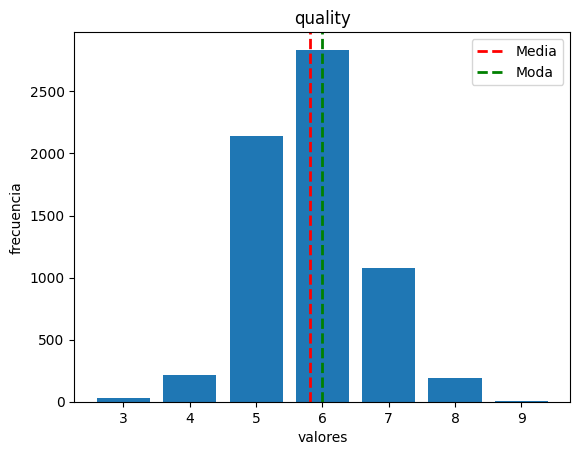

In [25]:
graficar(cabeceras, registros, "quality", "valores", "frecuencia")

La calida esta representada en una escala que va de la siguiente forma (1,2,3,4,5,6,7,8,9,10) siento 1 la peor calidad y 10 la mejor en la grafica podemos observar que la mayor parte de los datos de los vinos reflejan que son de calidad media.

La media obtenida del dataset es de: 5.8183

La moda obtenida del dataset es de: 6.0 y se repite 2836 veces